# 📘 Climate Data Analysis in Tanzania

## Objective
Analyzing historical climate data to understand trends and predict future climate patterns in Tanzania.

Step 1: Install & Import Required Libraries

In [1]:
# !pip install streamlit

# Import Libraries
!pip install --upgrade pip --default-timeout=100
!pip install statsmodels --default-timeout=100
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose

# For visualizations
%matplotlib inline
sns.set(style="whitegrid")

Defaulting to user installation because normal site-packages is not writeable
  Using cached pip-25.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-25.1.1-py3-none-any.whl (1.8 MB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Python313\python.exe -m pip install --upgrade pip --default-timeout=100


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Step 2: Load and View the Dataset

In [2]:
# Load your uploaded dataset
df = pd.read_csv(r"data\tanzania_climate_data.csv")
df.head()


,Year,Month,Average_Temperature_C,Total_Rainfall_mm,Max_Temperature_C,Min_Temperature_C
0,2000,1,26.1,19.8,32.0,21.9
1,2000,2,25.8,87.3,29.5,22.7
2,2000,3,26.8,266.5,29.9,21.8
3,2000,4,26.3,136.7,30.1,22.9
4,2000,5,26.0,63.1,30.7,22.4


Step 3: Data Preprocessing

In [3]:
# Check for missing values
print(df.isnull().sum())

# Check datatypes
df.dtypes

Year                     0
Month                    0
Average_Temperature_C    0
Total_Rainfall_mm        0
Max_Temperature_C        0
Min_Temperature_C        0
dtype: int64


Year                       int64
Month                      int64
Average_Temperature_C    float64
Total_Rainfall_mm        float64
Max_Temperature_C        float64
Min_Temperature_C        float64
dtype: object

Step 4: Exploratory Data Analysis (EDA)

In [4]:
# Descriptive statistics
print(df.describe())

              Year       Month  Average_Temperature_C  Total_Rainfall_mm  \
count   252.000000  252.000000             252.000000         252.000000   
mean   2010.000000    6.500000              25.707540         100.363889   
std       6.067351    3.458922               0.541047          80.485087   
min    2000.000000    1.000000              24.200000           6.000000   
25%    2005.000000    3.750000              25.300000          39.325000   
50%    2010.000000    6.500000              25.700000          72.200000   
75%    2015.000000    9.250000              26.000000         147.700000   
max    2020.000000   12.000000              27.500000         297.400000   

       Max_Temperature_C  Min_Temperature_C  
count         252.000000         252.000000  
mean           30.576587          21.698016  
std             1.292534           0.793070  
min            28.300000          19.700000  
25%            29.600000          21.100000  
50%            30.500000          21.70

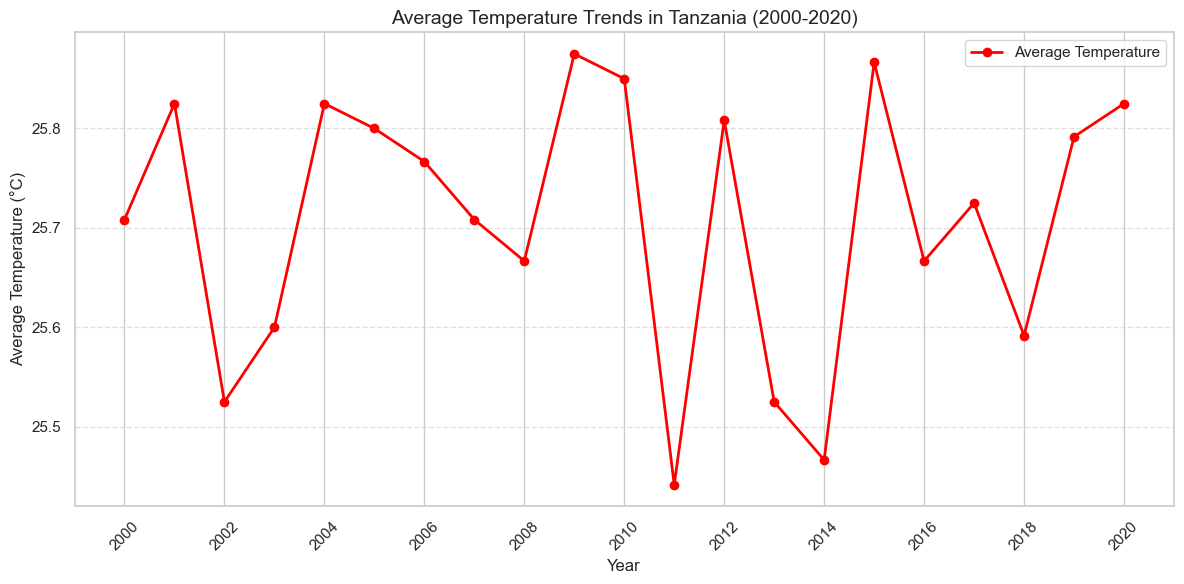

In [5]:
# Plot temperature trends over time
# Aggregate data by year (average temperature per year)
yearly_avg = df.groupby('Year')['Average_Temperature_C'].mean()

# Plot with proper years on x-axis
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg.index, yearly_avg.values, 
         color='red', 
         marker='o', 
         linestyle='-', 
         linewidth=2, 
         label='Average Temperature')

# Customize x-axis to show every 2 years
plt.xticks(range(2000, 2021, 2), rotation=45)  # 2000 to 2020, step=2

# Add labels and title
plt.title('Average Temperature Trends in Tanzania (2000-2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()  # Prevent label cutoff
plt.show()

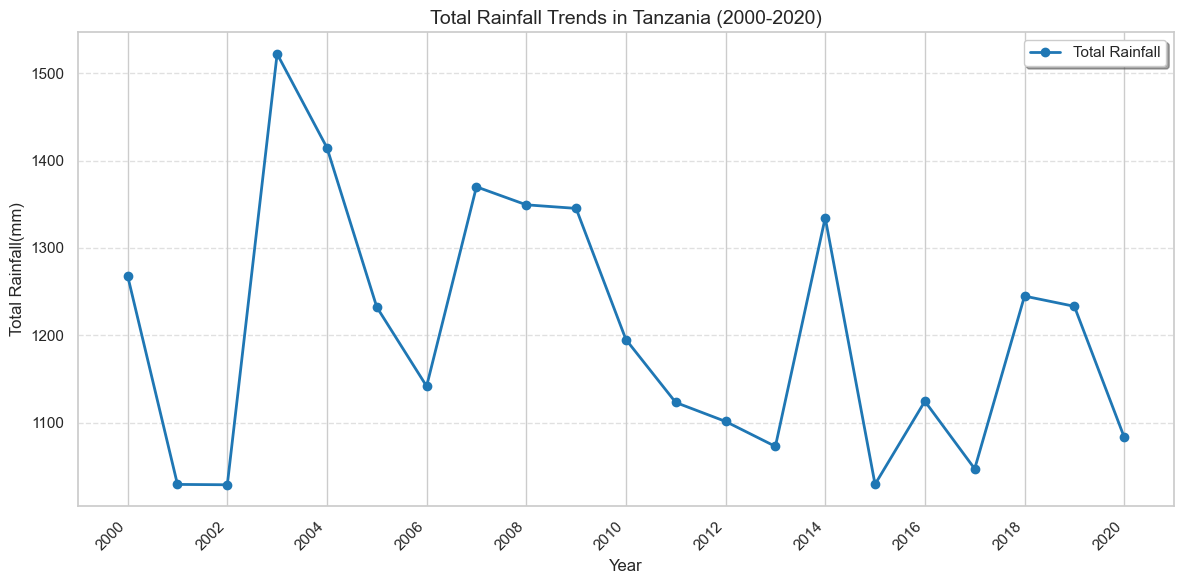

In [6]:
## Aggregate data by year (average temperature per year)
yearly_rainfall = df.groupby('Year')['Total_Rainfall_mm'].sum()

# Plot with proper years on x-axis
plt.figure(figsize=(12, 6))
plt.plot(yearly_rainfall.index, yearly_rainfall.values, 
         color='#1f77b4', 
         marker='o', 
         linestyle='-', 
         linewidth=2, 
         label='Total Rainfall')

# Customize x-axis to show every 2 years
plt.xticks(range(2000, 2021, 2), rotation=45, ha = 'right')  # 2000 to 2020, step=2

# Add labels and title
plt.title('Total Rainfall Trends in Tanzania (2000-2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Rainfall(mm)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(framealpha=1, shadow=True)
plt.tight_layout()  # Prevent label cutoff
plt.show()

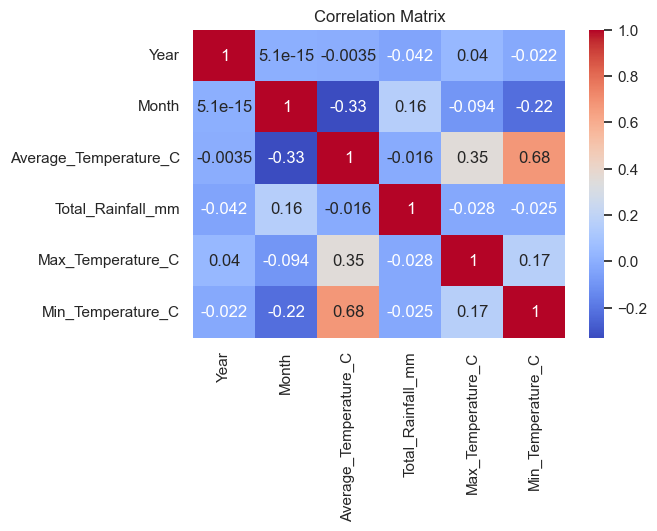

In [7]:
# Heatmap of correlations
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

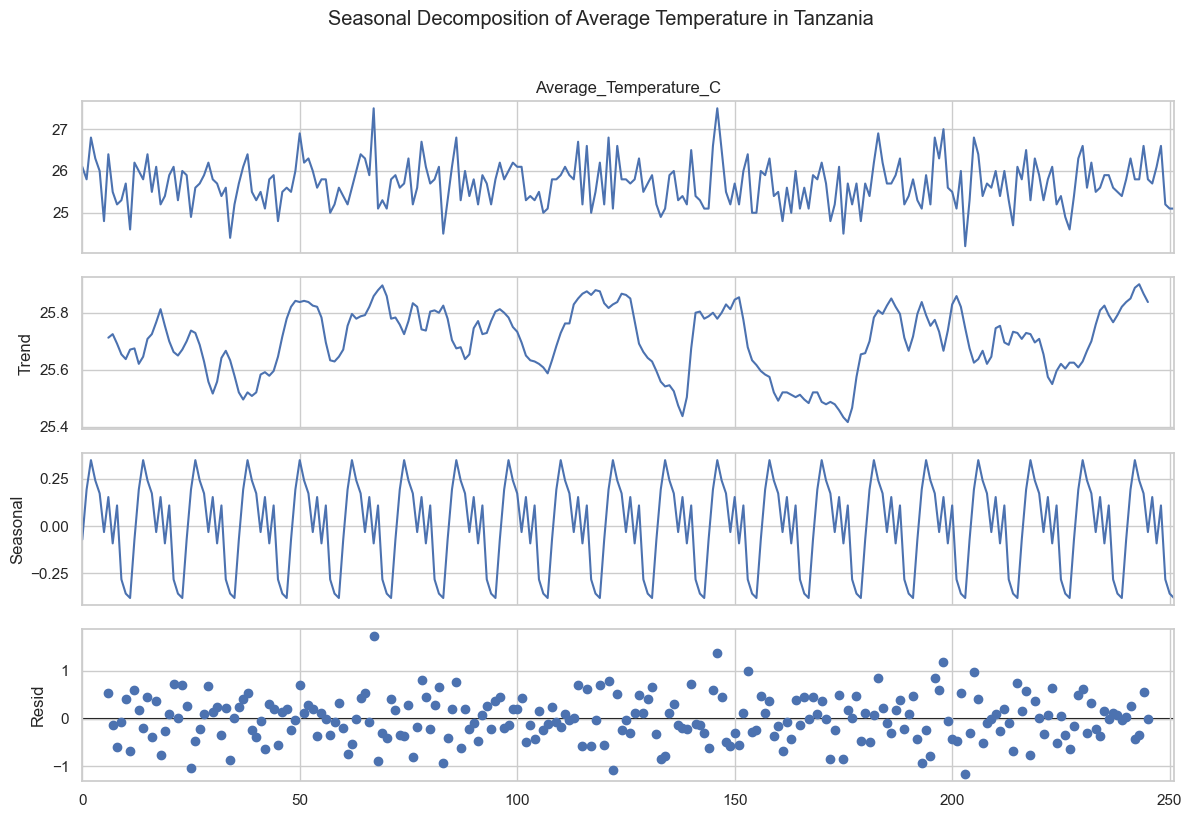

In [8]:
# Seasonal Decomposition
decomposition = seasonal_decompose(df['Average_Temperature_C'], model='additive', period=12)
# Plot with adjusted figure size and title spacing
plt.rcParams['figure.figsize'] = (12, 8)
decomposition.plot()
plt.suptitle("Seasonal Decomposition of Average Temperature in Tanzania", y=1.02)
plt.tight_layout()
plt.show()

Step 5: Train a Model to Predict Climate

A. Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split

X = df[['Year', 'Month', 'Total_Rainfall_mm']]  # Features
y = df['Average_Temperature_C']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

B. Random Forest Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = LinearRegression(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Manually calculate RMSE from MSE

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 0.50
RMSE: 0.64


C. Future Predictions

In [11]:
future_data = pd.DataFrame({
    'Year': [2025]*12,
    'Month': range(1,13),
    'Total_Rainfall_mm': df['Total_Rainfall_mm'].mean()  # Using average rainfall
})

future_temp = model.predict(future_data)
future_data['Predicted_Temperature'] = future_temp